In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quikr-car/quikr_car.xlsx - Worksheet.csv


## 1. Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import re
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression


## 2. Reading the Data

In [3]:
df=pd.read_csv("/kaggle/input/quikr-car/quikr_car.xlsx - Worksheet.csv")
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
df.shape

(892, 6)

In [5]:
df.info

<bound method DataFrame.info of                                        name    company  year          Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007         80,000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006       4,25,000   
2                Maruti Suzuki Alto 800 Vxi     Maruti  2018  Ask For Price   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014       3,25,000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014       5,75,000   
..                                      ...        ...   ...            ...   
887                                      Ta       Tara  zest       3,10,000   
888                     Tata Zest XM Diesel       Tata  2018       2,60,000   
889                      Mahindra Quanto C8   Mahindra  2013       3,90,000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014       1,80,000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014       1,60,000   

     kms_driven fue

## 3. Missing values heatmap

In [6]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

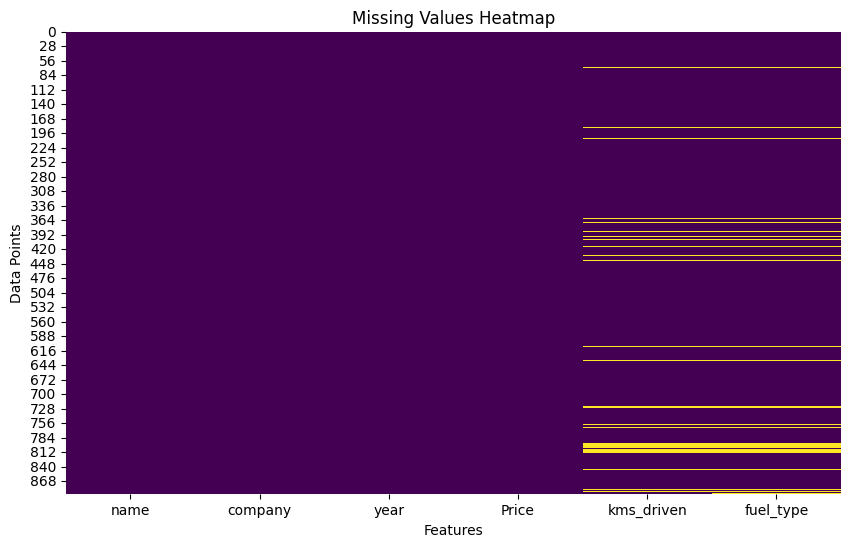

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.title('Missing Values Heatmap')
plt.show()


## 4. Analysing the 'Price' column

In [8]:
unique_prices = df['Price'].unique()
print(unique_prices)


['80,000' '4,25,000' 'Ask For Price' '3,25,000' '5,75,000' '1,75,000'
 '1,90,000' '8,30,000' '2,50,000' '1,82,000' '3,15,000' '4,15,000'
 '3,20,000' '10,00,000' '5,00,000' '3,50,000' '1,60,000' '3,10,000'
 '75,000' '1,00,000' '2,90,000' '95,000' '1,80,000' '3,85,000' '1,05,000'
 '6,50,000' '6,89,999' '4,48,000' '5,49,000' '5,01,000' '4,89,999'
 '2,80,000' '3,49,999' '2,84,999' '3,45,000' '4,99,999' '2,35,000'
 '2,49,999' '14,75,000' '3,95,000' '2,20,000' '1,70,000' '85,000'
 '2,00,000' '5,70,000' '1,10,000' '4,48,999' '18,91,111' '1,59,500'
 '3,44,999' '4,49,999' '8,65,000' '6,99,000' '3,75,000' '2,24,999'
 '12,00,000' '1,95,000' '3,51,000' '2,40,000' '90,000' '1,55,000'
 '6,00,000' '1,89,500' '2,10,000' '3,90,000' '1,35,000' '16,00,000'
 '7,01,000' '2,65,000' '5,25,000' '3,72,000' '6,35,000' '5,50,000'
 '4,85,000' '3,29,500' '2,51,111' '5,69,999' '69,999' '2,99,999'
 '3,99,999' '4,50,000' '2,70,000' '1,58,400' '1,79,000' '1,25,000'
 '2,99,000' '1,50,000' '2,75,000' '2,85,000' '3,40,00

In [9]:
ask_for_price_count = df[df['Price'] == 'Ask For Price'].shape[0]
print("Number of 'Ask For Price' entries:", ask_for_price_count)


Number of 'Ask For Price' entries: 35


In [10]:

df['Price'] = df['Price'].replace('Ask For Price', np.nan)


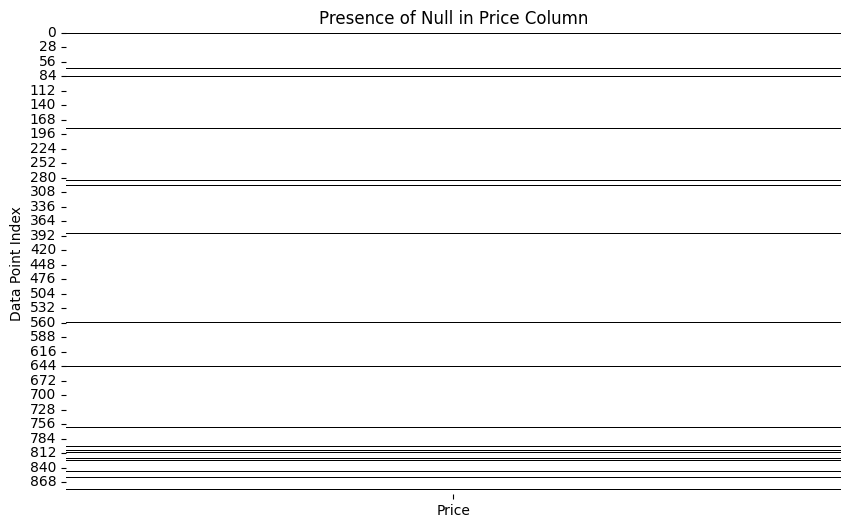

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price']].isnull(), cmap='binary', cbar=False)
plt.title('Presence of Null in Price Column')
#plt.xlabel('Price')
plt.ylabel('Data Point Index')
plt.show()

## 5. Analysing the Year column

In [12]:

string_values_mask = ~df['year'].astype(str).str.isnumeric()
string_values = df[string_values_mask]['year']


print(string_values)

185     ...
195    150k
206    TOUR
286     ...
294    r 15
360    Zest
368    /-Rs
385    sale
395    ara)
401    SELL
414    tion
432    odel
433    2 bs
441    arry
560     Eon
593    o...
599    Zest
608    sale
614    Zest
616    ture
624     emi
635     car
643    able
645     no.
723    o...
725    d...
728     car
758    SALE
764    digo
792    sell
795    d Ex
796    n...
797    e...
798    D...
799    , Ac
800    go .
801    d...
802    k...
803    o c4
805    zire
806    o...
807    cent
808     ...
809    Sumo
810     cab
811    t xe
812     EV2
845    r...
884    sale
887    zest
Name: year, dtype: object


## 6.Dropping the data with Null Values

In [13]:
df=df.dropna(subset=['year', 'Price', 'kms_driven','fuel_type'])

In [14]:
missing_values = df.isna().sum()
print(missing_values)

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64


### Checking if still  year has string  value left

In [15]:

string_values_mask = ~df['year'].astype(str).str.isnumeric()
string_values = df[string_values_mask]['year']


print(string_values)

Series([], Name: year, dtype: object)


## 6.Dropping the Duplicate Data

In [16]:
df = df.drop_duplicates()

In [17]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


## Splitting the name

In [18]:
df.name.str.split(' ')

0        [Hyundai, Santro, Xing, XO, eRLX, Euro, III]
1                        [Mahindra, Jeep, CL550, MDI]
3      [Hyundai, Grand, i10, Magna, 1.2, Kappa, VTVT]
4              [Ford, EcoSport, Titanium, 1.5L, TDCi]
6                                        [Ford, Figo]
                            ...                      
883                  [Maruti, Suzuki, Ritz, VXI, ABS]
885                  [Tata, Indica, V2, DLE, BS, III]
886                          [Toyota, Corolla, Altis]
888                          [Tata, Zest, XM, Diesel]
889                            [Mahindra, Quanto, C8]
Name: name, Length: 724, dtype: object

## Keeping the first three words of name

In [19]:
def cleaner(str):
    words=str.split(' ')[:3]
    return ' '.join(words)

df.name=df.name.apply(cleaner)

## Company Name
Here we analyzed that where invalid company name was there was missing data present or some string data in numerical column for this we have already preprocessed the data so checking if we are correct with our assumption.

In [20]:
df.company.unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

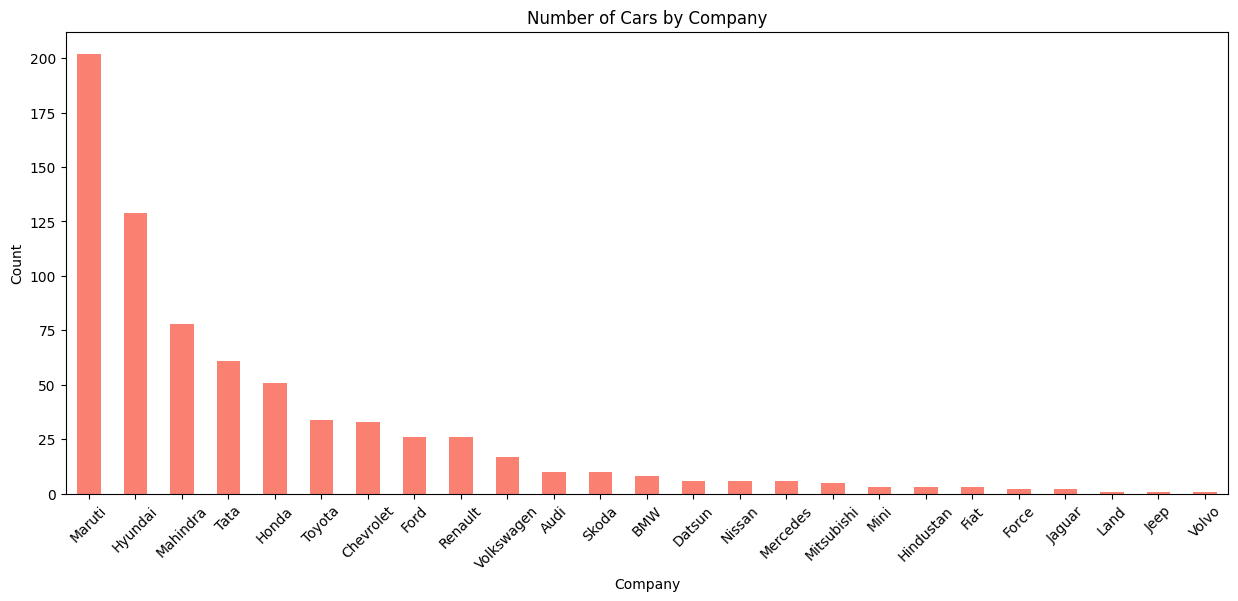

In [21]:
plt.figure(figsize=(15, 6))
df['company'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Number of Cars by Company')
plt.xticks(rotation=45)
plt.show()


## Working on data type to make it suitable for training data

In [22]:
print(df.dtypes)

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object


#### Since we have 'year','Price','km_driven' all of object data type we need to convert them into  numeric data 

In [23]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df['Price'] = df['Price'].str.replace(',', '').astype(int)

# Remove 'km' and ',' from the 'kms_driven' column using regular expressions
df['kms_driven'] = df['kms_driven'].str.replace(',', '')
df['kms_driven'] = df['kms_driven'].apply(lambda x: re.sub(r'\D', '', str(x)))

# Convert the values to integers
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')



In [24]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [25]:
print(df.dtypes)

name          object
company       object
year           int64
Price          int64
kms_driven     int64
fuel_type     object
dtype: object


### Checking number of fuel types present
Since we were trying to label encode the fuel type but value came to 0,1,2 which indicated that there are 3 fuel type so checking the third type fuel since our assumption was that there is two fuel only diesel and petrol.

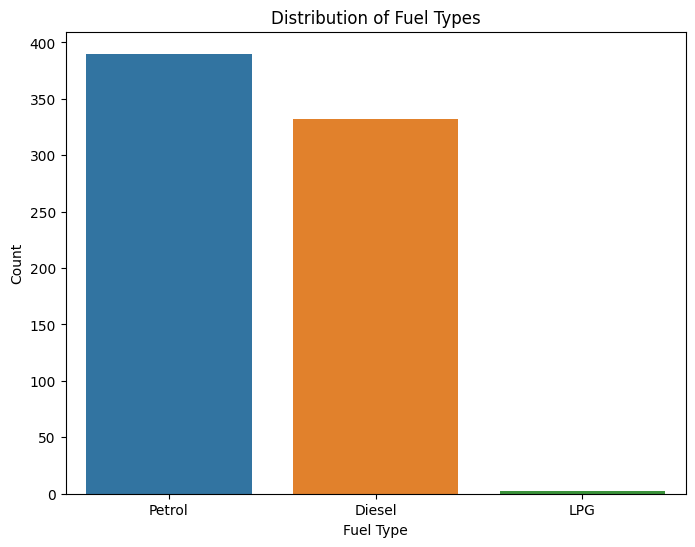

In [26]:
# Create a countplot for fuel types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fuel_type')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


#### Fuel Types- Petrol,Diesel and LPG 
In fuel type petrol,diesel are balance but LPG data is very very less


In [27]:
df.info

<bound method DataFrame.info of                        name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
3         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
4    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
6                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
883      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
885          Tata Indica V2      Tata  2009  110000       30000    Diesel
886    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
888            Tata Zest XM      Tata  2018  260000       27000    Diesel
889      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[724 rows x 6 columns]>

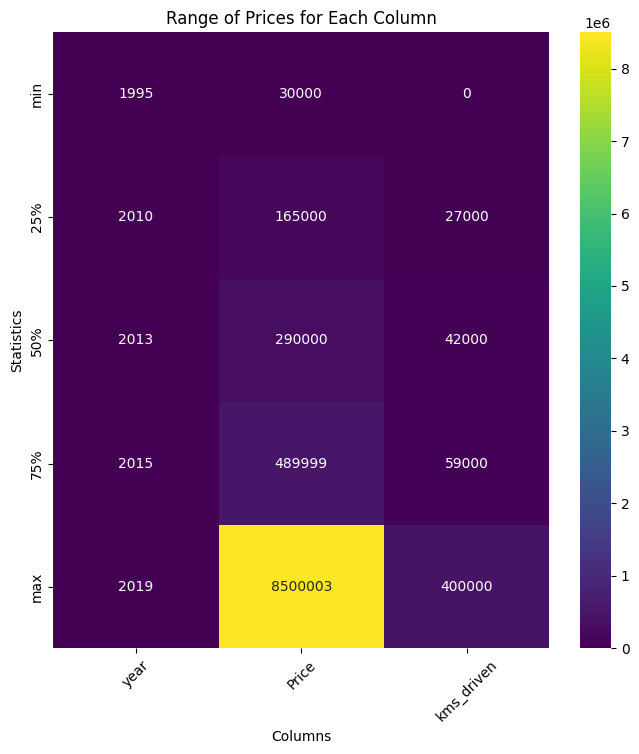

In [28]:
# Extract the numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(numerical_columns.describe().loc[['min', '25%', '50%', '75%', 'max']], annot=True, cmap='viridis', fmt='.0f')
plt.title('Range of Prices for Each Column')
plt.xlabel('Columns')
plt.ylabel('Statistics')
plt.xticks(rotation=45)
plt.show()

In [29]:
df.loc[np.argmax(df.Price)]

name          Audi Q3 2.0
company              Audi
year                 2013
Price             1499000
kms_driven          37000
fuel_type          Diesel
Name: 447, dtype: object

In [30]:
df.loc[np.argmin(df.Price)]

name          Mahindra TUV300 T4
company                 Mahindra
year                        2016
Price                     675000
kms_driven                  9000
fuel_type                 Diesel
Name: 296, dtype: object

### Price which are greater than 10 lakh

In [31]:
current_year = 2024  
df['age'] = current_year - df['year']

df.drop(columns=['year'], inplace=True)

In [32]:
df

,name,company,Price,kms_driven,fuel_type,age
0,Hyundai Santro Xing,Hyundai,80000,45000,Petrol,17
1,Mahindra Jeep CL550,Mahindra,425000,40,Diesel,18
3,Hyundai Grand i10,Hyundai,325000,28000,Petrol,10
4,Ford EcoSport Titanium,Ford,575000,36000,Diesel,10
6,Ford Figo,Ford,175000,41000,Diesel,12
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,270000,50000,Petrol,13
885,Tata Indica V2,Tata,110000,30000,Diesel,15
886,Toyota Corolla Altis,Toyota,300000,132000,Petrol,15
888,Tata Zest XM,Tata,260000,27000,Diesel,6


In [33]:
df.loc[df.Price>10e5]

,name,company,Price,kms_driven,fuel_type,age
49,Mitsubishi Pajero Sport,Mitsubishi,1475000,47000,Diesel,9
73,Mini Cooper S,Mini,1891111,13000,Petrol,11
79,Mini Cooper S,Mini,1891111,13500,Petrol,11
86,Volkswagen Vento Highline,Volkswagen,1200000,3600,Diesel,5
100,BMW 7 Series,BMW,1600000,35000,Petrol,15
231,Mercedes Benz GLA,Mercedes,2000000,20000,Diesel,9
232,Land Rover Freelander,Land,2100000,30000,Diesel,9
235,Mercedes Benz B,Mercedes,1400000,31000,Petrol,10
249,Mini Cooper S,Mini,1891111,13000,Petrol,11
338,Audi A4 2.0,Audi,1350000,40000,Diesel,12


### Since Mahindra XUV500 W10 is of range 10 to 12 lakh and Mahindra XUV500 W6 is 85 lakh which is quite unreasonable

In [34]:
df.loc[df.name.str.contains('Mahindra XUV500')]

,name,company,Price,kms_driven,fuel_type,age
101,Mahindra XUV500 W8,Mahindra,701000,38000,Diesel,11
175,Mahindra XUV500,Mahindra,699999,52000,Diesel,10
323,Mahindra XUV500,Mahindra,649999,47000,Diesel,10
329,Mahindra XUV500,Mahindra,689999,80000,Diesel,11
361,Mahindra XUV500,Mahindra,1000000,15000,Diesel,9
366,Mahindra XUV500,Mahindra,1130000,72000,Diesel,8
417,Mahindra XUV500 W8,Mahindra,560000,100000,Diesel,12
484,Mahindra XUV500 W6,Mahindra,548900,49800,Diesel,11
562,Mahindra XUV500 W6,Mahindra,8500003,45000,Diesel,10
563,Mahindra XUV500 W10,Mahindra,1299000,40000,Diesel,6


### Mahindra XUV500 W6 at 2013 is 548900 we can take of that order for 2014 also

In [35]:
df.at[562, 'Price'] = 550000

In [36]:
df.loc[562]

name          Mahindra XUV500 W6
company                 Mahindra
Price                     550000
kms_driven                 45000
fuel_type                 Diesel
age                           10
Name: 562, dtype: object

In [37]:
df['mileage'] = df['kms_driven'] / df['age']

In [38]:
from scipy import stats
def identify_outliers(sub_df):
    return sub_df[(np.abs(stats.zscore(sub_df['mileage'])) > 3)]

# Applying the function to each model group
outliers_df = df.groupby('name').apply(identify_outliers).reset_index(drop=True)
outliers_df

/tmp/ipykernel_18/2198248284.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df = df.groupby('name').apply(identify_outliers).reset_index(drop=True)


,name,company,Price,kms_driven,fuel_type,age,mileage
0,Honda City 1.5,Honda,240000,400000,Petrol,14,28571.428571
1,Maruti Suzuki Alto,Maruti,190000,72000,Petrol,7,10285.714286
2,Maruti Suzuki Ertiga,Maruti,1000000,200000,Diesel,12,16666.666667
3,Maruti Suzuki Swift,Maruti,350000,166000,Diesel,8,20750.000000
4,Maruti Suzuki Swift,Maruti,350000,146000,Diesel,8,18250.000000


In [39]:
#saving cleaned data as csv file
df.to_csv('Cleaned-Quikr-car-dataset.csv',index=False)

### Top 5 Most expensive cars

In [40]:
df.loc[df.Price.sort_values().tail().index]

,name,company,Price,kms_driven,fuel_type,age,mileage
667,Jaguar XF 2.2,Jaguar,2190000,29000,Diesel,11,2636.363636
668,Audi Q5 2.0,Audi,2390000,34000,Diesel,10,3400.000000
510,Jaguar XE XE,Jaguar,2800000,8500,Petrol,8,1062.500000
838,Ford Endeavor 4x4,Ford,2900000,9000,Diesel,5,1800.000000
719,Audi A3 Cabriolet,Audi,3100000,12516,Petrol,9,1390.666667


In [41]:
#feature matrix
X=df.drop(columns='Price')
#target column
y=df.Price

## Splitting the train and test data

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [43]:
X.shape,X_train.shape,X_test.shape

((724, 6), (434, 6), (290, 6))

In [44]:
y.shape,y_train.shape,y_test.shape

((724,), (434,), (290,))

In [45]:
y_train = np.log(y_train)
# X_train['kms_driven'] = np.log(X_train['kms_driven']+1)
# X_test['kms_driven'] = np.log(X_test['kms_driven']+1)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [47]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [48]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                     remainder='passthrough')


In [49]:
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
y_pred = np.exp(y_pred)

In [50]:
r2_score(y_test,y_pred)

0.5264358014240464

In [51]:
rmse=np.sqrt(np.mean((y_test - y_pred) ** 2))
rmse

278984.4811481432

In [52]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    y_train = np.log(y_train)
#     X_train['mileage'] = np.log(X_train['mileage']+1)
#     X_test['mileage'] = np.log(X_test['mileage']+1)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_pred = np.exp(y_pred)
    scores.append(r2_score(y_test,y_pred))

In [53]:
np.argmax(scores)

534

In [54]:
scores[np.argmax(scores)]

0.8823593336515547

In [55]:
import pickle
import xgboost as xgb


In [56]:
scores=[]
for i in range(500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    y_train = np.log(y_train)
#     X_train['mileage'] = np.log(X_train['mileage']+1)
#     X_test['mileage'] = np.log(X_test['mileage']+1)
    xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
    pipe = make_pipeline(column_trans, xgb_reg)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_pred = np.exp(y_pred)
    scores.append(r2_score(y_test,y_pred))


In [57]:
np.argmax(scores)

342

In [58]:
scores[np.argmax(scores)]

0.8926174054910099

In [59]:
rmse=np.sqrt(np.mean((y_test - y_pred) ** 2))
rmse

157842.6435950021

In [60]:
from sklearn.ensemble import RandomForestRegressor
scores=[]
rf_reg = RandomForestRegressor(random_state=42)
pipe = make_pipeline(column_trans, rf_reg)
for i in range(500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    y_train = np.log(y_train)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_pred = np.exp(y_pred)
    scores.append(r2_score(y_test,y_pred))

In [61]:
np.argmax(scores)

91

In [62]:
scores[np.argmax(scores)]

0.8156486018577698

In [63]:
sample_data = pd.DataFrame(columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'],
                           data=np.array(['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']).reshape(1, 5))
sample_data['year'] = pd.to_numeric(sample_data['year'], errors='coerce')
sample_data['kms_driven'] = pd.to_numeric(sample_data['kms_driven'], errors='coerce')

current_year = 2024  
sample_data['age'] = current_year - sample_data['year']
sample_data.drop(columns=['year'], inplace=True)

sample_data['mileage'] = sample_data['kms_driven'] / sample_data['age']


prediction = pipe.predict(sample_data)
prediction = np.exp(prediction)
print("Predicted Price:", prediction)


Predicted Price: [405669.2910432]


# NEURAL NETWORK 

In [64]:
import tensorflow as tf

2024-03-18 09:17:08.760551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 09:17:08.760788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 09:17:08.947975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [65]:
x=pd.get_dummies(X, columns=['company', 'fuel_type',"name"])
x
y = df['Price']
y=np.log(y)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
y_train

561    11.849398
8      13.629181
537    11.652687
730    11.002100
525    13.815511
         ...    
96     12.765688
133    12.560244
351    13.262124
549    12.278393
128    12.206073
Name: Price, Length: 579, dtype: float64

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [69]:
def r_squared(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# Adjusting the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(285,), kernel_initializer='he_normal'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=[r_squared])

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')


In [71]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=1000,
                    batch_size=32,
                    verbose=2)


Epoch 1/1000
15/15 - 2s - 135ms/step - loss: 18378942.0000 - r_squared: -3.1549e+07 - val_loss: 11986.4648 - val_r_squared: -2.1616e+04
Epoch 2/1000
15/15 - 0s - 7ms/step - loss: 7613485.5000 - r_squared: -1.2517e+07 - val_loss: 153529.7656 - val_r_squared: -2.7143e+05
Epoch 3/1000
15/15 - 0s - 8ms/step - loss: 6831533.5000 - r_squared: -1.1567e+07 - val_loss: 198219.5312 - val_r_squared: -3.5271e+05
Epoch 4/1000
15/15 - 0s - 6ms/step - loss: 4549346.5000 - r_squared: -8.9854e+06 - val_loss: 810793.8125 - val_r_squared: -1.4478e+06
Epoch 5/1000
15/15 - 0s - 9ms/step - loss: 3918507.7500 - r_squared: -6.8299e+06 - val_loss: 559265.7500 - val_r_squared: -9.9952e+05
Epoch 6/1000
15/15 - 0s - 9ms/step - loss: 2676127.2500 - r_squared: -4.5901e+06 - val_loss: 237578.5938 - val_r_squared: -4.2462e+05
Epoch 7/1000
15/15 - 0s - 10ms/step - loss: 1465695.2500 - r_squared: -2.9701e+06 - val_loss: 153752.5000 - val_r_squared: -2.7403e+05
Epoch 8/1000
15/15 - 0s - 6ms/step - loss: 1190137.5000 - r